Лабораторная работа 1. Визуализация данных.
> Богомолов Дмитрий ИУ5-23М


Подключение библиотек

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import *
data = load_boston()
%matplotlib inline 
sns.set(style="ticks")

Вывод размеров датасета

In [2]:
X, y = load_boston(return_X_y=True)
print(X.shape)

(506, 13)


Создание Pandas Dataframe

In [0]:
def make_dataframe(ds_function):
    ds = ds_function()
    df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     columns= list(ds['feature_names']) + ['target'])
    return df

In [4]:
data = make_dataframe(load_boston)  #Создание датафрейма
data.head()                         #Вывод первых 5 строк

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Вывод вспомогательной информации о датасете

In [5]:
data.dtypes #Типы данных каждого атрибута

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [6]:
for col in data.columns:
    # Количество пустых значений
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

CRIM - 0
ZN - 0
INDUS - 0
CHAS - 0
NOX - 0
RM - 0
AGE - 0
DIS - 0
RAD - 0
TAX - 0
PTRATIO - 0
B - 0
LSTAT - 0
target - 0




*   **CRIM** per capita crime rate by town
*   **ZN** proportion of residential land zoned for lots over 25,000 sq.ft.
*   **INDUS** proportion of non-retail business acres per town
*   **CHAS** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
*   **NOX** nitric oxides concentration (parts per 10 million)
*   **RM** average number of rooms per dwelling
*   **AGE** proportion of owner-occupied units built prior to 1940
*   **DIS** weighted distances to five Boston employment centres
*   **RAD** index of accessibility to radial highways
*   **TAX** full-value property-tax rate per $10,000
*   **PTRATIO** pupil-teacher ratio by town
*   **B** 1000(Bk - 0.63)^2 

*   **LSTAT** % lower status of the population
*   **MEDV** Median value of owner-occupied homes in $1000's


Криминальный уровень преступности на душу населения по городам

ZN доля жилой земли, зонированной на участки свыше 25 000 кв.фут.

Индус доля акров не-розничного бизнеса в городе

Фиктивная переменная CHAS Charles River (= 1, Если тракт ограничивает реку; 0 в противном случае)

Концентрация оксидов азота NOX (частей на 10 млн.)

RM среднее количество комнат в одном жилом помещении

Возрастная доля единиц, занятых владельцами, построенных до 1940 года

DIS взвешенные расстояния до пяти бостонских центров занятости

Рад индекс доступности радиальных магистралей

Налог на недвижимость с полной стоимостью-ставка налога на $ 10,000

PTRATIO соотношение учеников и учителей по городам

B 1000 (Bk - 0.63)^2,

 где Bk-доля черных по городам.
LSTAT % более низкий статус населения
MEDV медианная стоимость домов, занятых владельцами ,в $ 1000


Вывод описательных статистик по каждому атрибуту

In [7]:
data.describe() #Описательные статистики

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Определим количество уникальных значений

In [8]:
data['target'].unique()

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 13.6, 19.6, 15.2, 14.5,
       15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 13.2, 13.1, 13.5, 20. ,
       24.7, 30.8, 34.9, 26.6, 25.3, 21.2, 19.3, 14.4, 19.4, 19.7, 20.5,
       25. , 23.4, 35.4, 31.6, 23.3, 18.7, 16. , 22.2, 33. , 23.5, 22. ,
       17.4, 20.9, 24.2, 22.8, 24.1, 21.4, 20.8, 20.3, 28. , 23.9, 24.8,
       22.5, 23.6, 22.6, 20.6, 28.4, 38.7, 43.8, 33.2, 27.5, 26.5, 18.6,
       20.1, 19.5, 19.8, 18.8, 18.5, 18.3, 19.2, 17.3, 15.7, 16.2, 18. ,
       14.3, 23. , 18.1, 17.1, 13.3, 17.8, 14. , 13.4, 11.8, 13.8, 14.6,
       15.4, 21.5, 15.3, 17. , 41.3, 24.3, 27. , 50. , 22.7, 23.8, 22.3,
       19.1, 29.4, 23.2, 24.6, 29.9, 37.2, 39.8, 37.9, 32.5, 26.4, 29.6,
       32. , 29.8, 37. , 30.5, 36.4, 31.1, 29.1, 33.3, 30.3, 34.6, 32.9,
       42.3, 48.5, 24.4, 22.4, 28.1, 23.7, 26.7, 30.1, 44.8, 37.6, 46.7,
       31.5, 31.7, 41.7, 48.3, 29. , 25.1, 17.6, 24

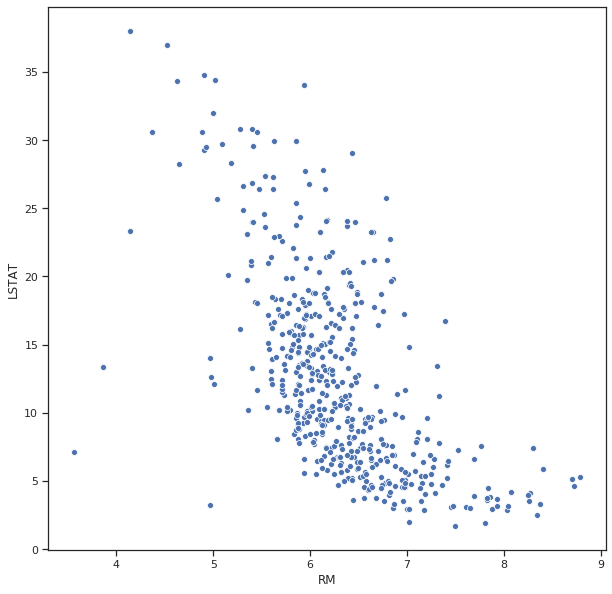

In [9]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='RM', y='LSTAT', data=data)

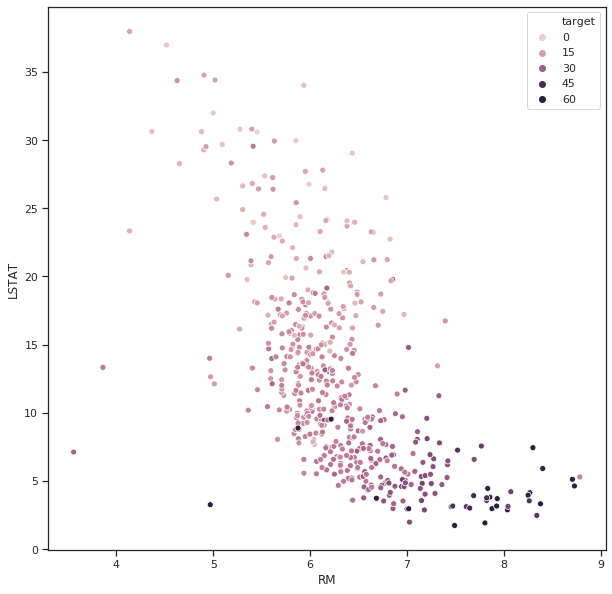

In [10]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='RM', y='LSTAT', data=data, hue='target')

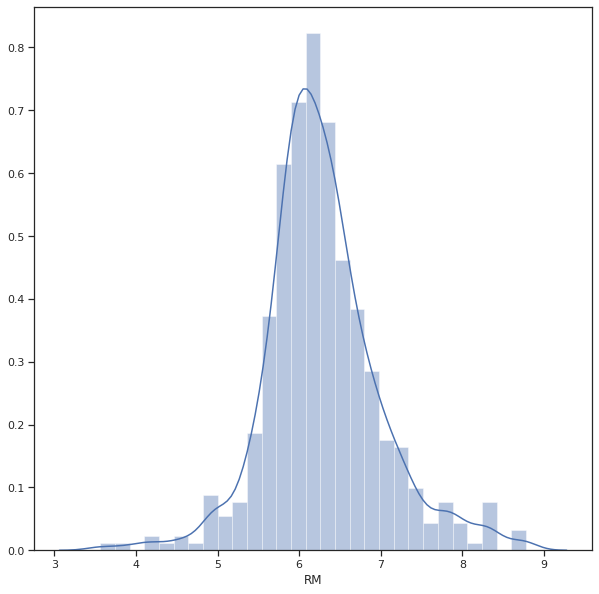

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['RM'])

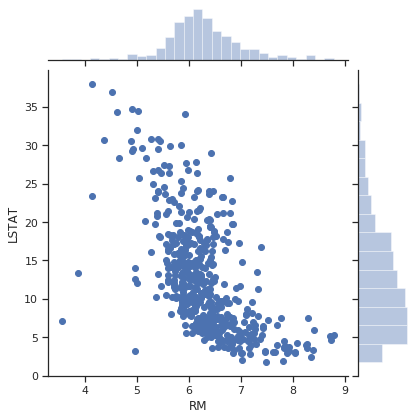

In [12]:
sns.jointplot(x='RM', y='LSTAT', data=data)

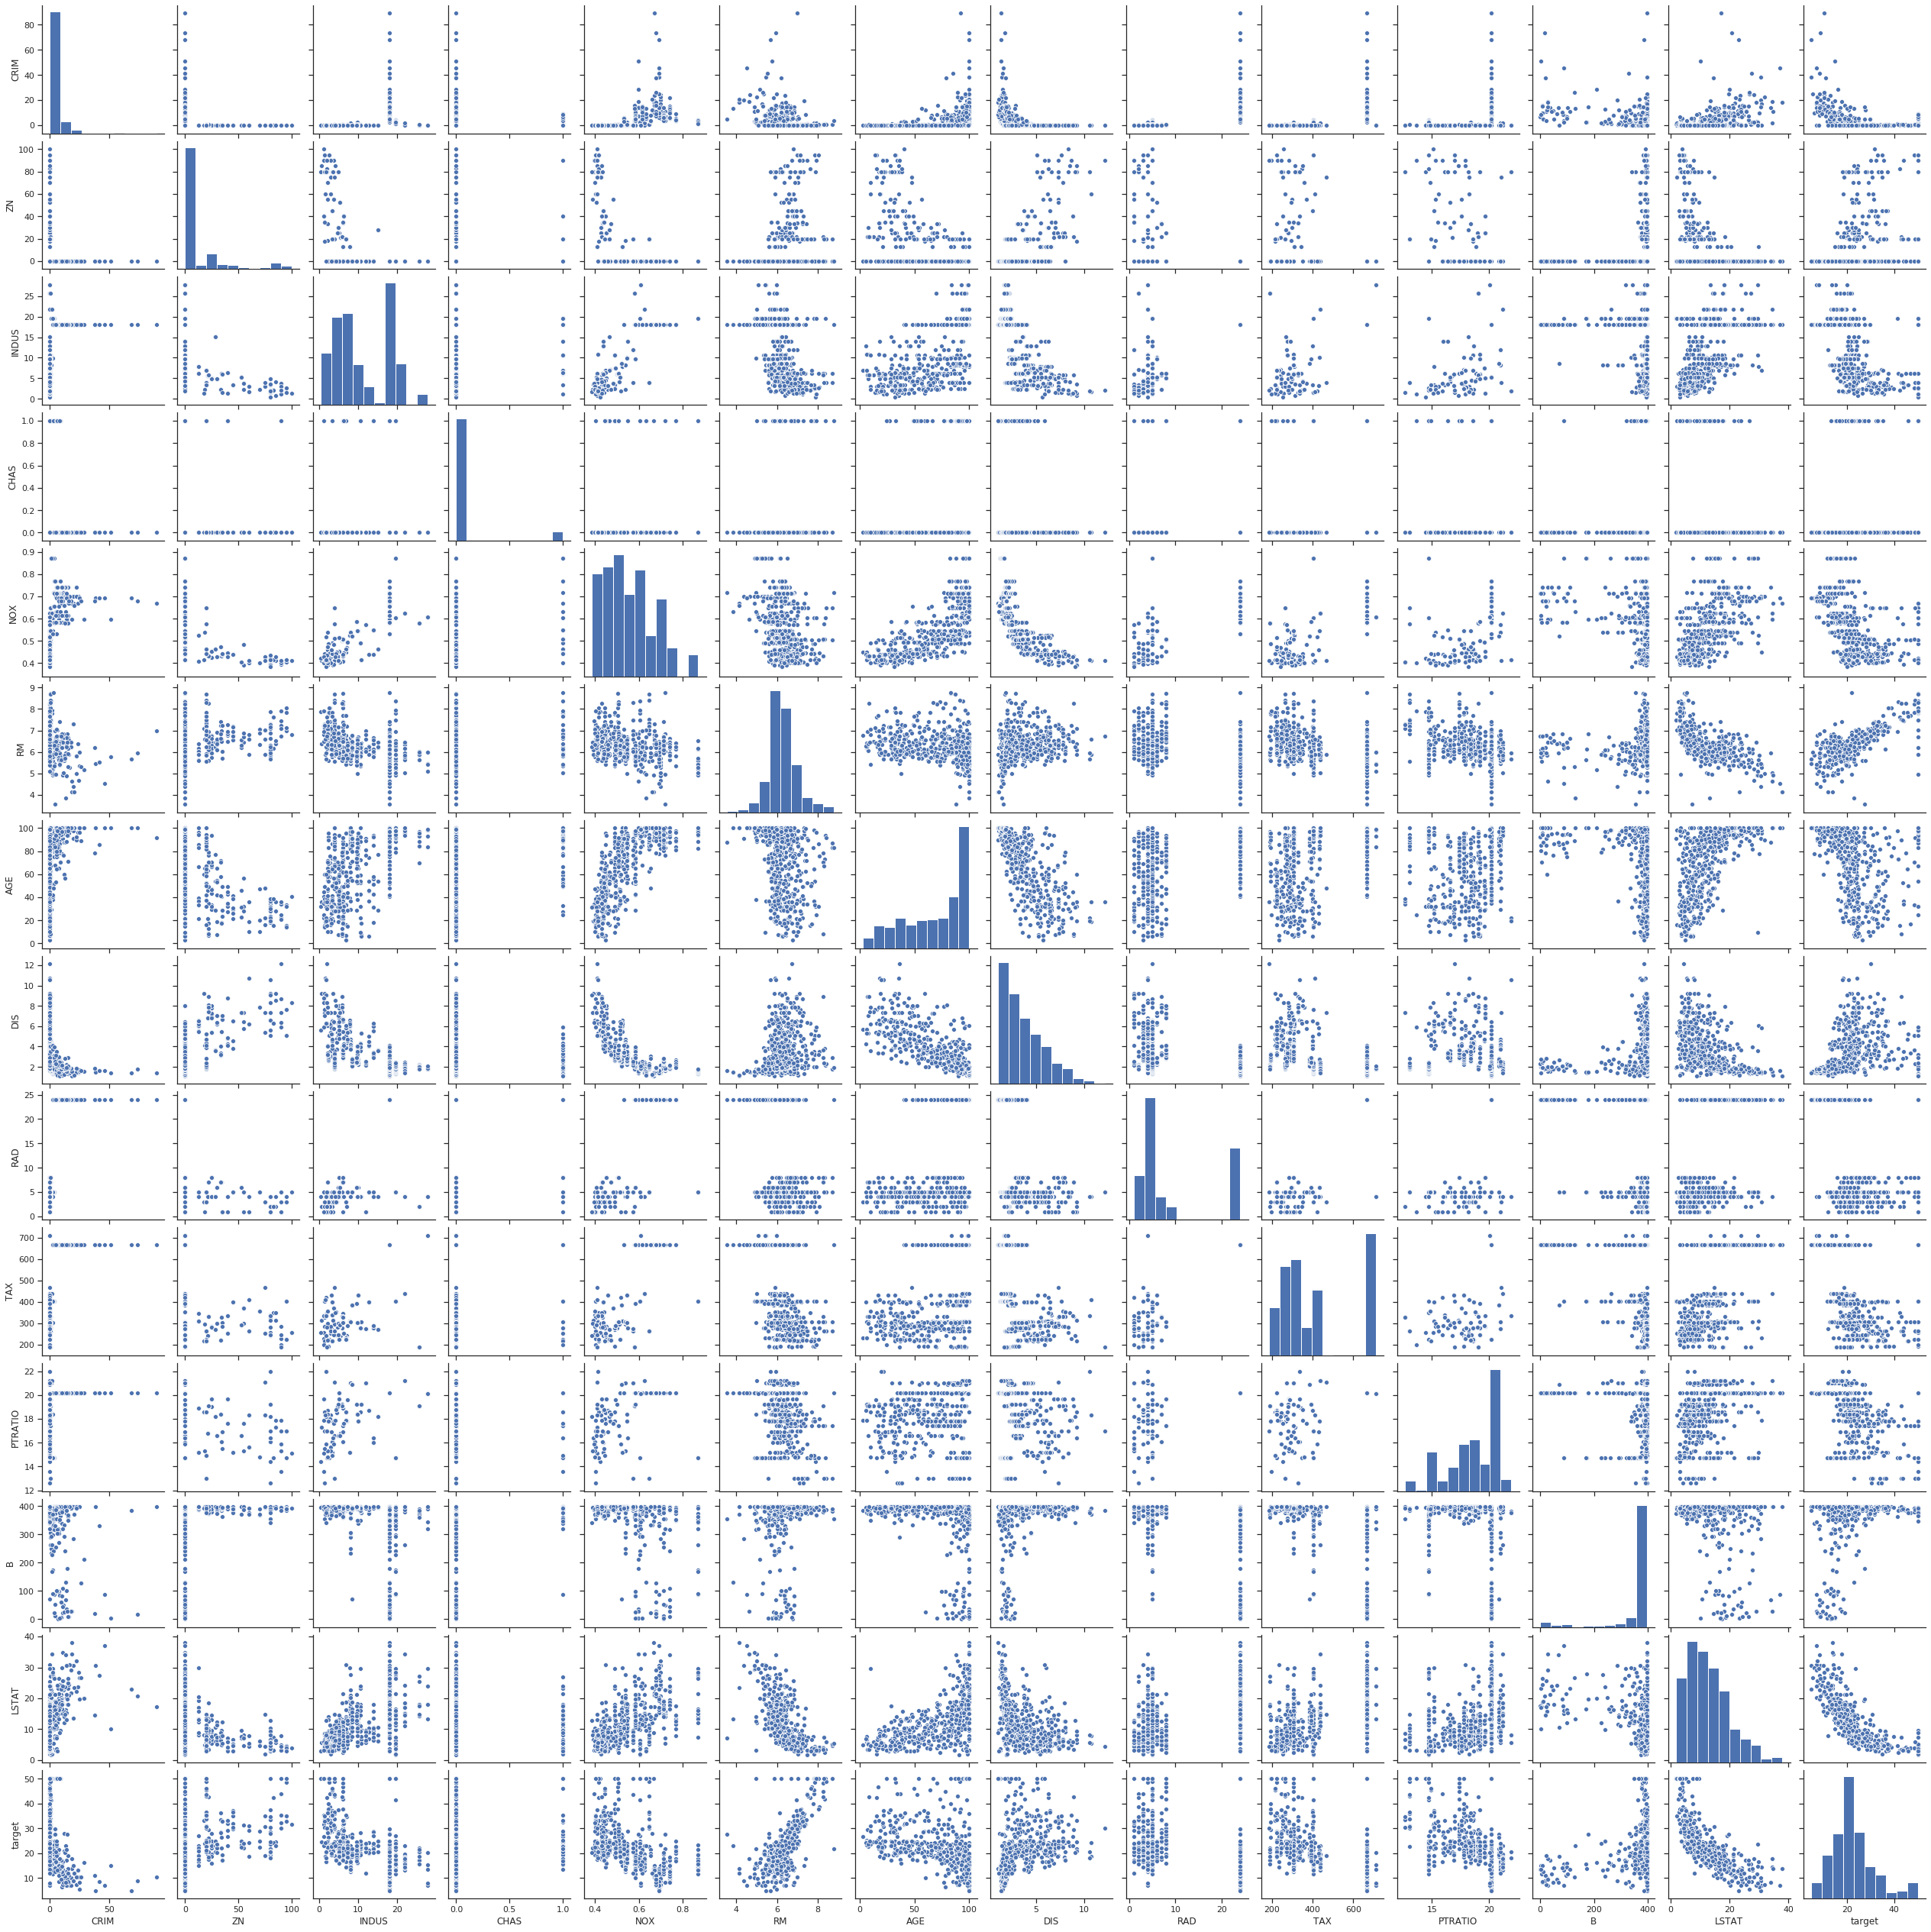

In [13]:
sns.pairplot(data)

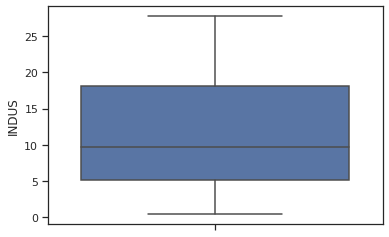

In [14]:
sns.boxplot(y=data['INDUS'])

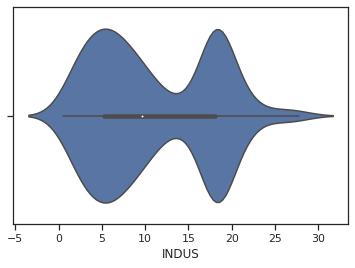

In [15]:
sns.violinplot(x=data['INDUS'])

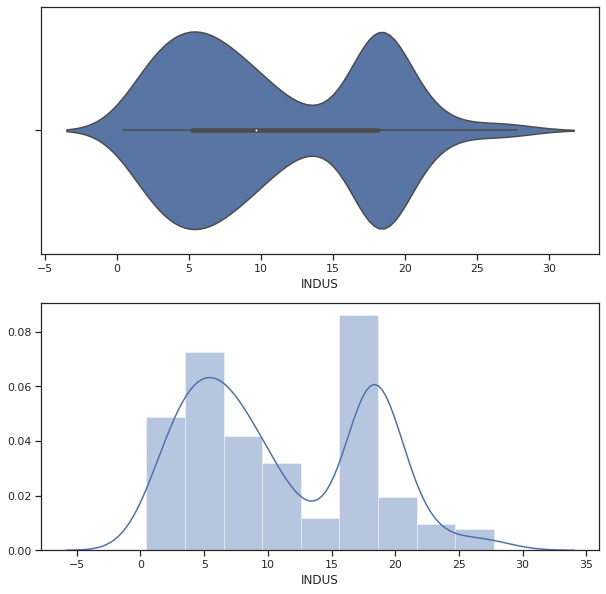

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['INDUS'])
sns.distplot(data['INDUS'], ax=ax[1])

In [17]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


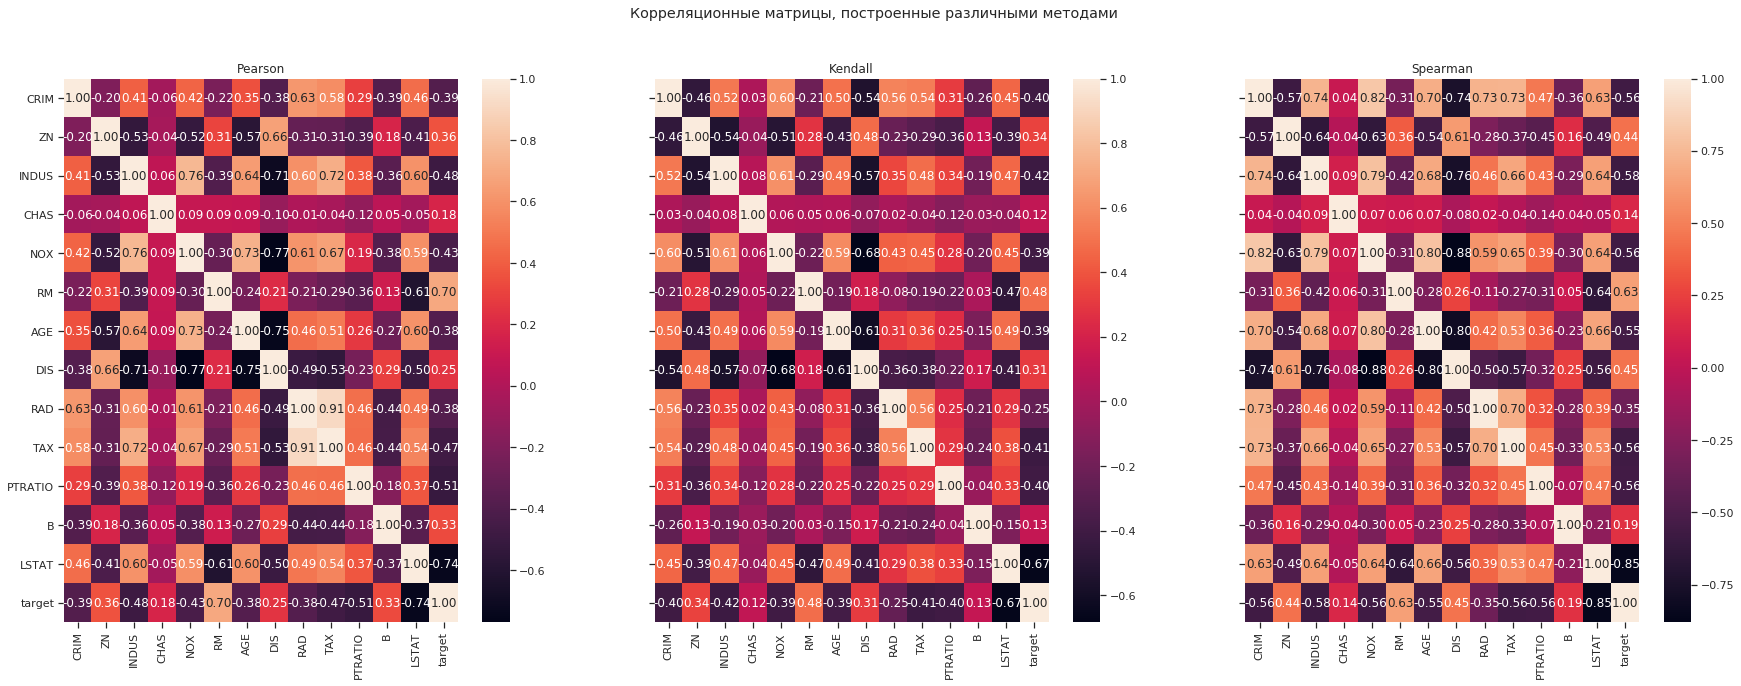

In [18]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(30,10))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')


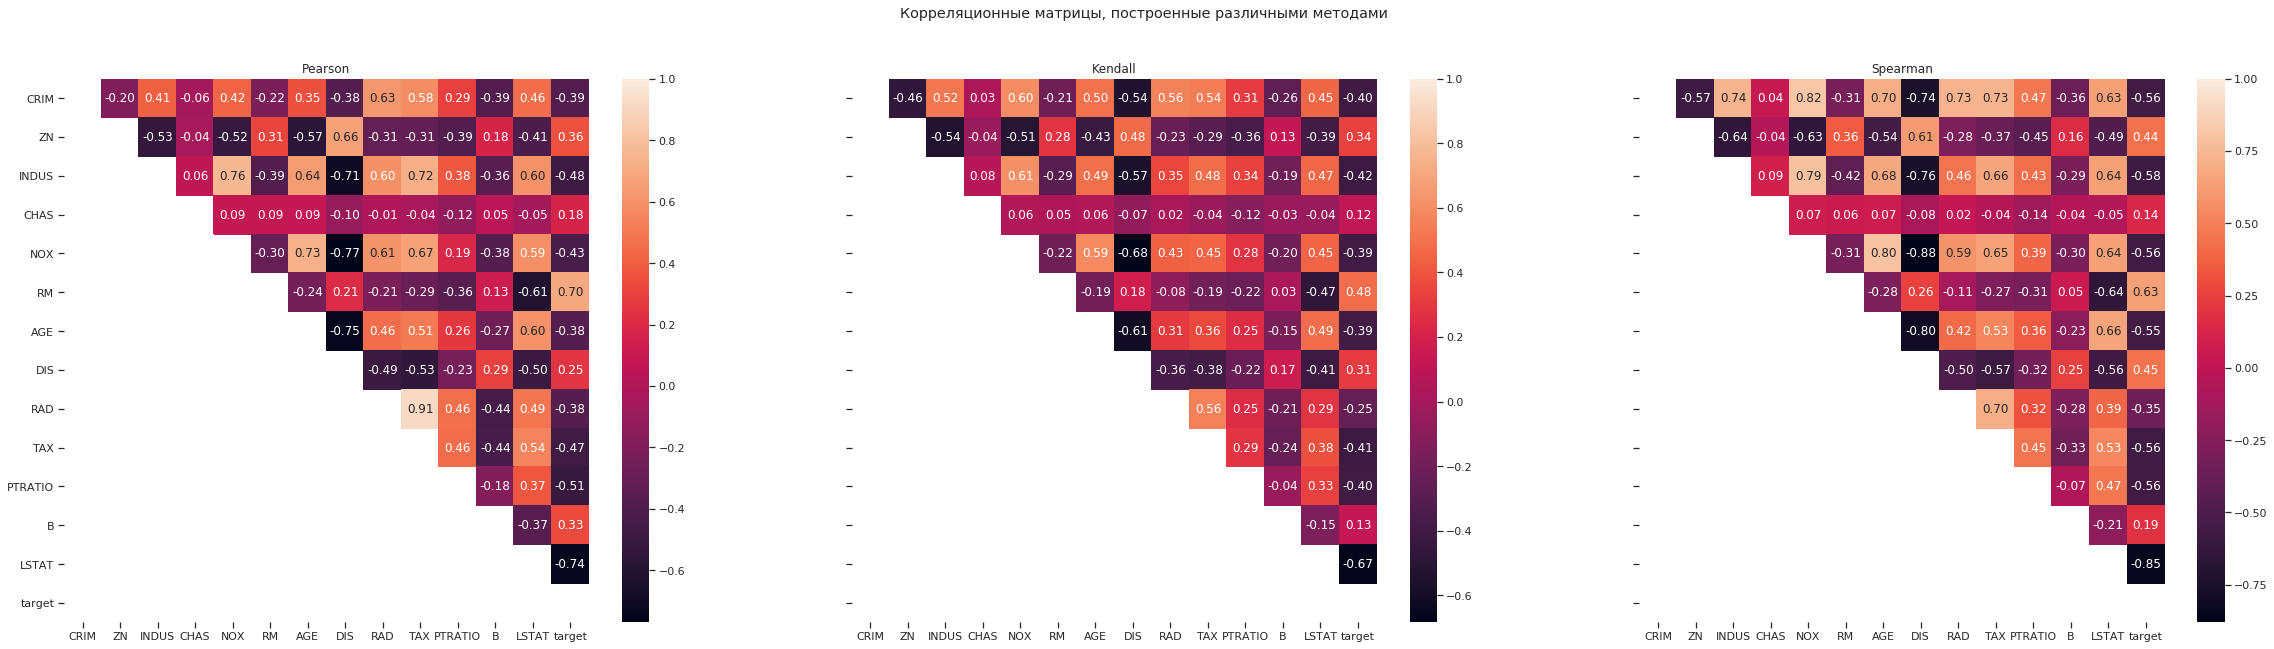

In [19]:
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(40,10))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], mask=mask, annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], mask=mask, annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], mask=mask, annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

![alt text](https://www.oreilly.com/content/wp-content/uploads/sites/2/2019/06/image03-ed83fc425039627301882be4b06e32a5.png)